In [1]:
from twaidata.torchdatasets.whole_brain_dataset import MRISegmentationDataset
from trustworthai.utils.augmentation.standard_transforms import RandomFlip, GaussianBlur, GaussianNoise, \
                                                            RandomResizeCrop, RandomAffine, \
                                                            NormalizeImg, PairedCompose #RandomColourJitter
import os
import matplotlib.pyplot as plt

### Load some data

In [2]:
rootdir = "/media/benp/NVMEspare/datasets/preprocessing_attempts/local_results/WMH_challenge_dataset"
domain = "Singapore"
dataset_dir = os.path.join(rootdir, domain)

In [3]:
dataset = MRISegmentationDataset(dataset_dir)

In [4]:
len(dataset)

20

In [5]:
img, label = dataset[10]

In [6]:
img.shape, label.shape

(torch.Size([2, 48, 256, 232]), torch.Size([1, 48, 256, 232]))

In [7]:
def plot_img(img, islice, channel=0, subplot=(1,1,1), title=""):
    plt.subplot(*subplot)
    plt.imshow(img[channel, islice, :, :])
    plt.axis(False)
    plt.title(title)
    if subplot == (1,1,1):
        plt.show()

In [8]:
islice = 30

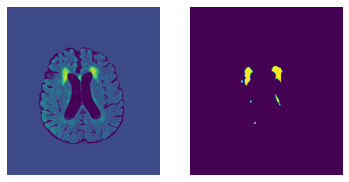

In [9]:
plot_img(img, islice, subplot=(1,2,1))
plot_img(label, islice, subplot=(1,2,2))

### test each transform

In [154]:
p = 1.
transforms = {
    "flipper": RandomFlip(p=p, orientation="horizontal"),
    "cropper": RandomResizeCrop(p=p, scale=(0.6, 1.), ratio=(3./4., 4./3.)),
    "blurer": GaussianBlur(p=p, kernel_size=7, sigma=(.1,1.5)),
    "noiser": GaussianNoise(p=p, mean=0, sigma=0.2),
    "affine_shearer": RandomAffine(p=p, shear=(.1,3.)),
    "affine_rotater": RandomAffine(p=p, degrees=5),
    "affine_translator": RandomAffine(p=p, translate=(10,10)),
    "affine_scaler": RandomAffine(p=p, scale=1.5),
    # "hue_jitter": RandomColourJitter(p=p, hue=(0.1,0.5)),
    # "saturation_jitter": RandomColourJitter(p=p, saturation=(0.1,0.5)),
    # "contrast_jitter": RandomColourJitter(p=p, contrast=(0.1,0.5)),
    # "brightness_jitter": RandomColourJitter(p=p, brightness=(0.1,0.5)),
    "normalizer": NormalizeImg()
}


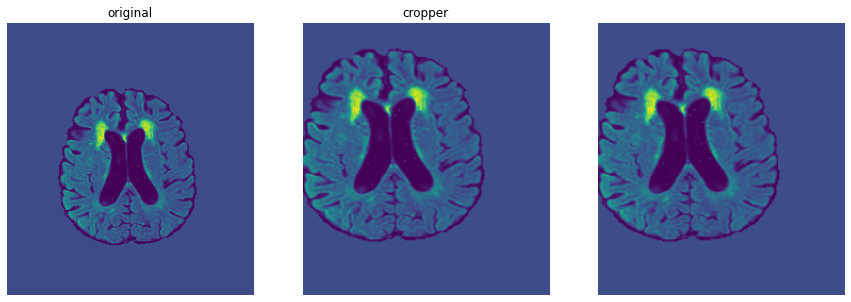

In [176]:
name = "cropper"
t = transforms[name]
imgt1, imgt2 = t(img, img)
plt.figure(figsize=(15,5))
plot_img(img, islice, subplot=(1,3,1), title="original")
plot_img(imgt1, islice, subplot=(1,3,2), title=name)
plot_img(imgt2, islice, subplot=(1,3,3))

### How to combine transforms

In [12]:
group = PairedCompose([transforms["flipper"], transforms["cropper"]])

In [13]:
img_t, label_t = group(img, label)

In [14]:
img_t.shape, label_t.shape

(torch.Size([2, 48, 256, 232]), torch.Size([1, 48, 256, 232]))

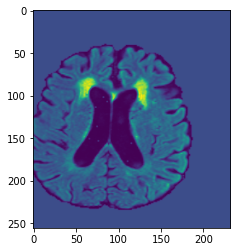

In [77]:
plt.imshow(img_t[0,islice,:,:])

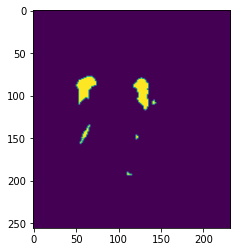

In [78]:
plt.imshow(label_t[0,islice,:,:])